In [1]:
import seaborn as sns
import pandas as pd
samples = sns.load_dataset('iris')
species = samples['species']
samples = samples.drop(['species'], axis=1)
samples = samples.values
display(samples)
display(species)




array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [2]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

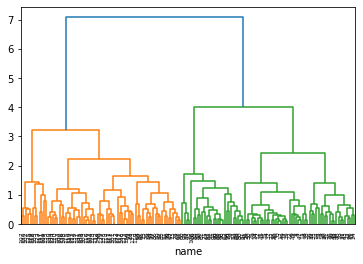

In [3]:

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
dendrogram(mergings,
           labels=[i for i in range(150)],
           leaf_rotation=90,
           leaf_font_size=6)
plt.xlabel('name')
plt.show()

In [4]:
from scipy.cluster.hierarchy import linkage, fcluster
mergings = linkage(samples, method='complete')
labels = fcluster(mergings, 15, criterion='distance')
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


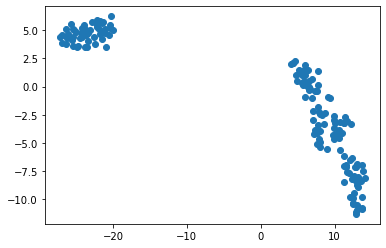

In [5]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(xs, ys)
plt.show()

In [6]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)

transformed = model.transform(samples)

In [14]:
com = model.components_
com

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

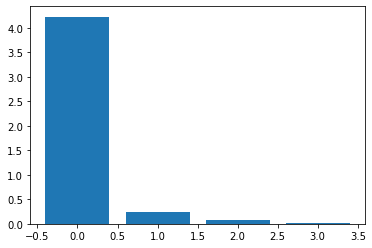

In [11]:
features = range(model.n_components_)

plt.bar(features, model.explained_variance_)
plt.show()

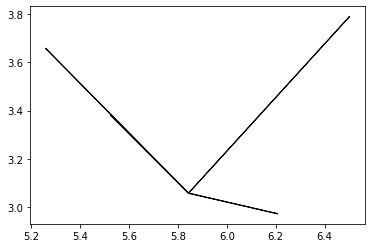

In [16]:
mean = model.mean_
for i in com:
    plt.arrow(mean[0], mean[1], i[0], i[1])

plt.show()

In [17]:
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD()
model.fit(samples)
transformed = model.transform(samples)

In [18]:
transformed


array([[ 5.91274714e+00,  2.30203322e+00],
       [ 5.57248242e+00,  1.97182599e+00],
       [ 5.44697714e+00,  2.09520636e+00],
       [ 5.43645948e+00,  1.87038151e+00],
       [ 5.87564494e+00,  2.32829018e+00],
       [ 6.47759822e+00,  2.32464996e+00],
       [ 5.51597520e+00,  2.07090423e+00],
       [ 5.85092859e+00,  2.14807482e+00],
       [ 5.15891972e+00,  1.77506408e+00],
       [ 5.64500117e+00,  1.99000106e+00],
       [ 6.26539771e+00,  2.42576813e+00],
       [ 5.75200785e+00,  2.02037338e+00],
       [ 5.48058085e+00,  1.97777558e+00],
       [ 4.95112411e+00,  2.04828749e+00],
       [ 6.52596417e+00,  2.91606081e+00],
       [ 6.79037199e+00,  2.82500759e+00],
       [ 6.27239468e+00,  2.60811578e+00],
       [ 5.92953789e+00,  2.26766614e+00],
       [ 6.64813130e+00,  2.38959506e+00],
       [ 6.09486463e+00,  2.36082303e+00],
       [ 6.25397363e+00,  2.12001187e+00],
       [ 6.07364677e+00,  2.27178150e+00],
       [ 5.36999813e+00,  2.49808604e+00],
       [ 6.

In [2]:
import sklearn.datasets
newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
X, y = newsgroups.data, newsgroups.target

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [4]:
X.shape

(11314, 130107)

In [ ]:
knn.fit(X,y)
y_pred = knn.predict(X)

In [ ]:
from sklearn.linear_model import LogisticRegression\
lr = LogisticRegression()
lr.fit(X,y)

lr.predict_proba()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=1)
dt=DecisionTreeClassifier(max_depth=2, random_state=1)

In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**0.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

from sklearn.ensemble import GradientBoostingRegressor